# Final Assignment Jorge Durán

**Jorge Eduardo Durán Vásquez - Student ID: 229487**

I will check the solutions given for similarities. If you work out the solution to individual tasks together with fellow students, you must indicate this in the solutions to the corresponding tasks. Solve the tasks before 5th of June 2022. You are only allowed to import the following modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


import statsmodels.api as sm
import statsmodels.formula.api as smf

import pickle

from selenium import webdriver
import json

## 1. Data preprocessing and plots

**1.1** Import 'players_21.csv' as a pandas data dataframe. Define a new column 'value' with stores the market value ('value_eur') in millions.

In [2]:
# First, the data frame with the data that is stored in the .csv file is stored in "df"
df= pd.read_csv (r'players_21.csv')
# Given the variable "value_eur" we divide by 1'000.000 to obtain the millions units 
value = df['value_eur']/1000000
# Now we insert the new column in the second possiton of the data set
df.insert(loc=1, column='value', value=value)
# We print the data set to check that the elements were correctly carged in memory.
print (df)

       sofifa_id   value                                         player_url  \
0         158023  67.500  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  46.000  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         200389  75.000  https://sofifa.com/player/200389/jan-oblak/210002   
3         188545  80.000  https://sofifa.com/player/188545/robert-lewand...   
4         190871  90.000  https://sofifa.com/player/190871/neymar-da-sil...   
...          ...     ...                                                ...   
18939     256679   0.040  https://sofifa.com/player/256679/kevin-angulo/...   
18940     257710   0.035  https://sofifa.com/player/257710/mengxuan-zhan...   
18941     250989   0.035  https://sofifa.com/player/250989/zhenghao-wang...   
18942     257697   0.040  https://sofifa.com/player/257697/zitong-chen/2...   
18943     257936   0.030   https://sofifa.com/player/257936/yue-song/210002   

              short_name                           

**1.2** Show the most valuable player for each position ('team_position'). Display the position, the name ('short_name'), and the market value in millions.

In [3]:
# First, I look the names of the columns to take the correct 
# column names in next exercises
print(df.columns.tolist())

['sofifa_id', 'value', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name', 'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'mo

In [4]:
# we first sort the values in decending order to have the most valuable player for each
# position on top then we drop the duplicates of position to obtain all the first elements.
df2 = df.sort_values(by='value', ascending = False).drop_duplicates(subset='team_position')
# Print the results, notice that some players have missing values in the possition column,
# for that reason we are also printing the most valuable player that does not have position.
print(df2[['team_position','short_name','value']])

      team_position           short_name  value
6                LS            K. Mbappé  105.5
4                LW            Neymar Jr   90.0
5               RCM         K. De Bruyne   87.0
3                ST       R. Lewandowski   80.0
11               RW             M. Salah   78.0
8               LCB          V. van Dijk   75.5
2                GK             J. Oblak   75.0
22               RS            P. Dybala   71.0
0               CAM             L. Messi   67.5
20              RDM           J. Kimmich   65.0
29               RB  T. Alexander-Arnold   60.0
34              LCM       Bernardo Silva   60.0
17              CDM             Casemiro   59.5
62               RM           K. Havertz   57.0
15               CF           K. Benzema   53.0
65               LM          M. Rashford   53.0
13              SUB            S. Agüero   53.0
33               LB         A. Robertson   53.0
48              RCB            R. Varane   46.5
104             LDM          L. Goretzka

**1.3** Show the 10 most valuable teams ('club_name')! Display the total market value and the
size of the squad!

In [5]:
# From the data set we take the variables "club_name" and "value", then we groupby the 
# name of the clubs and apply the aggregation function "sum" over the value
df_teams= df[['club_name','value']].groupby(['club_name']).sum().reset_index()

# Now we have to calculate the size of the squad. To do so we count the number of 
# times that a name appear in the data set.
df_teams['Size_squad']=df_teams['club_name'].map(df['club_name'].value_counts())

# We print the 10 first results in desending order to get the ranking of the most valuable teams 
print(df_teams.sort_values(by='value', ascending = False).head(10))

               club_name    value  Size_squad
374            Liverpool  840.625          33
489          Real Madrid  760.850          32
386      Manchester City  747.275          33
214         FC Barcelona  722.200          33
216    FC Bayern München  609.700          22
451  Paris Saint-Germain  605.675          29
131              Chelsea  602.275          33
64       Atlético Madrid  582.500          33
612    Tottenham Hotspur  571.525          33
387    Manchester United  564.130          33


**1.4** Plot the minium, the mean and the maximum value for each overall player strength group. (Replicate ``'overall.pdf'.``)


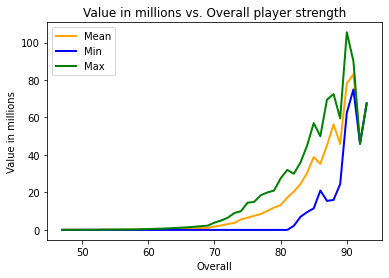

In [6]:
# We create a df helpper that store the variables "overall" and "value"   
df_help = df[['overall','value']]

# We group by all values of overall and apply the aggregation function "mean", "min" and "max"
df_overall= df_help.groupby('overall').agg({'value': ['mean', 'min', 'max']}).reset_index()

# First, we plot the Overall vs the mean Value of each group 
plt.plot(df_overall['overall'], # Variable in the X axis
         df_overall[('value','mean')], # Variable in the Y axis
         label='Mean', # Name of the plot
         linewidth=2.0, # The line width 
         color='orange', 
         linestyle='-')

# Second, we plot the Overall vs the min Value of each group 
plt.plot(df_overall['overall'],
      df_overall[('value','min')],
         label='Min',
         linewidth=2.0,
         color='blue',
         linestyle='-')
# third, we plot the Overall vs the max Value of each group 
plt.plot(df_overall['overall'],
      df_overall[('value','max')],
         label='Max',
         linewidth=2.0,
         color='green',
         linestyle='-')

# Main name of the plot
plt.title('Value in millions vs. Overall player strength')
# naming the x axis
plt.xlabel('Overall')
# naming the y axis
plt.ylabel('Value in millions')
# show a legend on the plot
plt.legend()
# function to save the plot as ".pdf"
plt.savefig('overall_jorge.pdf')  
# function to show the plot
plt.show()

***1.5*** Add lines of code in the following template to replicate ``'potential.pdf'``. Explain precisely the line where dot_color is determined and why this solution is not efficient.

[('w', 0), ('y', 1), ('c', 5), ('g', 20), ('b', 50), ('k', 100)]


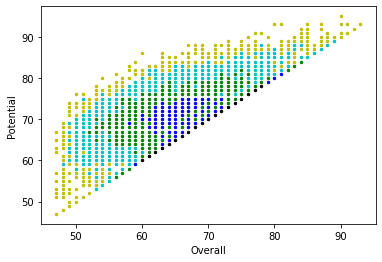

In [7]:
#Create a matrix filled with zeros and dimension 100x100
matrix = np.zeros((100,100))


for ov,pot in zip(df['overall'],df['potential']):
    # Increase the value in the matrix in "ov" row and the "pot" column by 1
    # each time that the combination "[ov,pot]" appears we sum 1
    matrix[ov,pot]= matrix[ov,pot] + 1 
    

colors=[('w',0),('y',1),('c',5),('g',20),('b',50),('k',100)]
print(colors)

# Iterate over ov grid
for ov in range(100):
    # Iterate over pot grid
    for pot in range(100):
        # Ignore all iterations where the count is zero
        if matrix[ov,pot]==0:
            continue
        
        dot_color = [color for color,value in colors if value<=matrix[ov,pot]][-1]
        # Plot a dot with ov as x,pot as y and dot_color as color
        plt.scatter(ov, pot, color = dot_color,s=6)
            

#Add the x and y label
# naming the x axis
plt.xlabel('Overall')
# naming the y axis
plt.ylabel('Potential')

#Save the figure
plt.savefig('potential_jorge.pdf')


**Explanation**

The line "dot_color" is a list comprehension where the condition in the if statement accepts the values that are lower or equal than the value that is stored in  matrix[ov,pot]. The iteration checks all entries in the vector "colors". It is done one by one in increasing order. It assigns the color that fulfills the condition. 

The solution is not efficient because it assigns a value many times until the whole vector of color is checked. That means that each value is checked 6 times, regardless if it has found the correct value in the first or in the last check.

## 2. Regression

***2.1*** Delete all players where the value is zero.

In [8]:
# with the drop function we delete all playes that have value == 0
df_reg = df.drop(df[df.value ==0].index)

print(df_reg)

       sofifa_id   value                                         player_url  \
0         158023  67.500  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  46.000  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         200389  75.000  https://sofifa.com/player/200389/jan-oblak/210002   
3         188545  80.000  https://sofifa.com/player/188545/robert-lewand...   
4         190871  90.000  https://sofifa.com/player/190871/neymar-da-sil...   
...          ...     ...                                                ...   
18939     256679   0.040  https://sofifa.com/player/256679/kevin-angulo/...   
18940     257710   0.035  https://sofifa.com/player/257710/mengxuan-zhan...   
18941     250989   0.035  https://sofifa.com/player/250989/zhenghao-wang...   
18942     257697   0.040  https://sofifa.com/player/257697/zitong-chen/2...   
18943     257936   0.030   https://sofifa.com/player/257936/yue-song/210002   

              short_name                           

***2.2*** Regress the logarithmic player value on the overall strength and potential of the player.  Which player is the most overvalued (highest residual value)?

In [10]:
# we Use the OLS function to apply the regression of the logarithmic player value
res=smf.ols('np.log(value) ~ overall + potential',data=df_reg).fit()
# we find the predictions of our model and store in the variable "Predicitons"
prediction=res.predict(df_reg[['overall','potential']])
# To find the most overvalued player we sustract from the real value the predicted one
SE = ((np.log(df_reg['value']))-prediction)
# We print the data in desending order to get the most overvalued players at top.
print(SE.sort_values(ascending = False))

#print(res.summary()) # Comment this line to have a clean view of the results

18942    1.198594
18943    1.177840
18939    1.131862
18938    1.065130
18941    1.065063
           ...   
6919    -2.289401
7300    -2.289401
5940    -2.306152
5936    -2.306152
5934    -2.306152
Length: 18707, dtype: float64


In [13]:
# We store the maximum value of SE in "Max_se"
max_se = SE.max()
# Now that we know the index of the most overvalued player we print the name:
print("the most overvalued player is: ", df_reg['short_name'].loc[[18942]])

the most overvalued player is:  18942    Chen Zitong
Name: short_name, dtype: object


***2.3*** Create dummies for the player positions. Note that several positions are possible per player.

In [15]:
positions=set()
for pos in df_reg['player_positions']:
    positions.update(pos.split(', '))
print(positions)

# The dummies for the player possition are greated with the following function,
# the case in which the a player have several position is cover witht the sep ", ".
positiondumm = pd.Series(df_reg['player_positions']).str.get_dummies(sep=', ')
# We check how the matrix with the dummies variables looks like.
print(positiondumm)

{'CF', 'ST', 'CAM', 'RW', 'GK', 'LB', 'LWB', 'LM', 'CB', 'RB', 'RWB', 'LW', 'CDM', 'RM', 'CM'}
       CAM  CB  CDM  CF  CM  GK  LB  LM  LW  LWB  RB  RM  RW  RWB  ST
0        0   0    0   1   0   0   0   0   0    0   0   0   1    0   1
1        0   0    0   0   0   0   0   0   1    0   0   0   0    0   1
2        0   0    0   0   0   1   0   0   0    0   0   0   0    0   0
3        0   0    0   0   0   0   0   0   0    0   0   0   0    0   1
4        1   0    0   0   0   0   0   0   1    0   0   0   0    0   0
...    ...  ..  ...  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ...  ..
18939    0   0    0   0   1   0   0   0   0    0   0   0   0    0   0
18940    0   1    0   0   0   0   0   0   0    0   0   0   0    0   0
18941    0   1    0   0   0   0   0   0   0    0   0   0   0    0   0
18942    0   0    0   0   1   0   0   0   0    0   0   0   0    0   0
18943    0   0    0   0   1   0   0   0   0    0   0   0   0    0   0

[18707 rows x 15 columns]


***2.4*** Regress the logarithmic player value on age, the squared age, Body-Mass-Index and, the player position dummies. Hint: The BMI is ``weight / height**2``.

In [16]:
# Because I will add a new variable to the data set called BMI I call agin the data frame
# "df_reg" to avoid problems when this secction of code is executed many times.
df_reg = df.drop(df[df.value ==0].index)
# we calculate the BMI, the height must be in meters and that is the reason why we have to
# divide by 100.
BMI = df_reg['weight_kg']/((df_reg['height_cm']/100)**2)

# Now, the new variable is inserted in the data frame
df_reg.insert(loc=1, column='BMI', value=BMI)

# Now, we fit the model with the variables that are indicated in the task.
res_bmi =smf.ols('np.log(value) ~ age + np.power(age, 2) + BMI + positiondumm',data=df_reg).fit()

# To check the results in the next exercise, I print the R squared of this model and then 
# the summary of the model
print(res_bmi.rsquared)
print(res_bmi.summary())


0.18432267617571352
                            OLS Regression Results                            
Dep. Variable:          np.log(value)   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     234.6
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        07:25:08   Log-Likelihood:                -30802.
No. Observations:               18707   AIC:                         6.164e+04
Df Residuals:                   18688   BIC:                         6.179e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -

***2.5*** Use the same model as in the last task. Now estimate all possible models in which you omit one explanatory variable. Which has the highest and lowest influence on the R Squared?

In [17]:
r2_dict={}

# We create a new Data frame only with the variables that are used in this section.
new_df= {'value_eur':df_reg['value_eur'], 'age': df_reg['age'], 'agesquare': np.power(df_reg['age'], 2), 'BMI':BMI }
df_regrev = pd.DataFrame(new_df)
# Here we concatenate the previous data frame with the dummies of the variable possition.
new_df_reg = pd.concat([df_regrev, positiondumm], axis=1)

# We iterate over all varables in "new_df_reg" and calculate the model.
for i in range(len(new_df_reg.columns)):
    res_bmitwo =smf.ols('np.log(value_eur) ~ new_df_reg.drop(new_df_reg.columns[[0, i]], axis=1)',data=new_df_reg).fit()
    # Now that the model is calculated the value of the R squared is stored in the dictionary
    r2_dict['Model '+str(i)]= res_bmitwo.rsquared

# Notice that the model 0 is the same model calculated in task 2.4.
print(pd.Series(r2_dict).sort_values())

Model 1     0.085441
Model 2     0.096177
Model 3     0.180071
Model 4     0.180315
Model 12    0.181010
Model 7     0.181134
Model 16    0.182169
Model 9     0.182401
Model 6     0.182425
Model 11    0.182615
Model 15    0.182669
Model 10    0.183645
Model 14    0.183761
Model 8     0.183837
Model 18    0.183958
Model 13    0.184198
Model 17    0.184275
Model 5     0.184318
Model 0     0.184323
dtype: float64


**Answer:** 

Model 0, correspond to the model with all explanatory variables. The variable that has the highest influence in R Square is Age. The variable with the lowest impact is the position dummy variable "CB" (cornerback).

## 3. Password

Create a program that performs the following tasks: (You are only allowed to import time and pickle. Use ``password.py`` as a template.)

1. When you start the program it aks you to enter a password. 

2. The password is stored in a pickle file. If the password is incorrect, it should be requested again. If the password is correct, you can choose between the following options:
    
    2.1. S: Show the information which is stored in 'secret_file.txt'!

    2.2. C: Change the password.

    2.3. L: Lock the program. (Go back to password request.)

    2.4. X: Exit the program.

3. If there is no pickle file with a password, it should ask you to set a new password and then store it into the pickle file.

4. If one enters the wrong password five times, it should wait for 10 seconds until it shows the message. 

5. It should check if the password has a minimum length of 8 and if consists of at least one number. It should also print if the requirement is fulfilled.






In [22]:
import pickle
import time

# We define the function "Change password"
def change_pw():
    while True:
        # We start the couting variables for lowercase alphabets (l),
        # uppercase alphabets (u) and the number of digits (d).
        l, u, d = 0, 0, 0
        # We ask for a new password
        new_password = input('Set your password:\n')
        
        # The first chek that we make is that the password has at least 8 characters 
        if (len(new_password) >= 8):
            for i in new_password:
                # counting lowercase alphabets 
                if (i.islower()):
                    l+=1            
                # counting uppercase alphabets
                if (i.isupper()):
                    u+=1            
                # counting digits
                if (i.isdigit()):
                    d+=1              
        # We check that the password has more than one digit, and the 
        # corresponding length.
        if (l>=1 and u>=1 and d>=1 and l+u+d==len(new_password)):
            print("\n","Password fulfil the length and the condition in the number of digits","\n")
        else:
            print("Invalid Password")
            continue
        # we ask the user to enter the password again to finish the process
        if new_password != input('Confirm password:\n'):
            print("\n",'Both Passwords must be equal.',"\n")
            continue
        # Save password into a pickle file.
        pickle.dump(new_password,open('pw_file.p', 'wb'))
        print("\n",'Password successfully saved.',"\n")
        break
    return new_password

failures=0
option = 'o' # This variable is to exit the whole program from the second "While True"

while True:
    # This section check the condition 3. 
    try:
        password = pickle.load( open( "pw_file.p", "rb" ) )
    except:
        #if there is not a pickle file we ask to set a new password.
        password = change_pw()
    
    # This Condition is only cheked when the user enter E from the second while loop 
    if option == 'E':
        break # This is used to finisch the outer loop.
    
    # Now we execute condition 4 from the task.
    if failures == 5:
        failures = 0 # Re set the couter to zero.
        print('You have made 5 errors. Now, you should wait 10 seconds.')
        time.sleep(10) # Wait for 10 seconds
    
    # Now the program starts for the user and we start asking for the password.
    # Also we give the possibility to exit the program.
    enter_password = input('Enter the password. (Or enter "E" to exit.)\n')
    
    if enter_password == "E":
        break # Finish the program.
    # In the case that the user enter the correct password    
    if enter_password == password:
        while True:
            # We give the following options:
            
            option = input('\nEnter "S" to show secret file, Enter "C" to change the password, Enter "L" to lock, Enter "E" to exit the programm.\n').upper()
            if option == "S":
                # Show the contents of the secret file
                with open('secret_file.txt') as f:
                    contents = f.read()
                print("\n",contents,"\n",)
                continue    
            if option == "C":
                change_pw() # Call the function to set a new password
                continue
            if option == "L":    
                break # Lock is finich the inner loop
            if option == "E":    
                break # This finich the inner loop and also set the value of "option" to E  

            print("\n",'No valid entry.',"\n")
    else:
        failures+=1
        print("\n",'Wrong Password!',"\n")
        
# user message to close the program execution        
print("\n",'Thanks for using our program, bye!')

Enter the password. (Or enter "E" to exit.)
 Jorge2022


KeyboardInterrupt: Interrupted by user

## 4. Webscraping

Create a program that queries all people on the English-language Wikipedia for a date in the format MM-DD are born on that day and saves it in a JSON file. (Note: See ``'07-13.json'`` as an example file.)

In [23]:
# to execute this part in Mac, I need to remove the ".exe" in the chrome_path
chrome_path=r'chromedriver'
driver = webdriver.Chrome(chrome_path)

In [24]:
# First, the date that we are looking for is store in the string element "date"
date='05-25'

#To take each number we split the string bu "-"
numbers_date = date.rsplit("-")

# Now, we list all months because the link in wikipedia use the name of the month directly in the URL
# so we need to be able to reproduce this
month_list=['January','February','March','April','May','June','July','August','September','October','November','December']

# We use the link and now we add the month from the "month_list" according to the first number in date
# also be add the number of the day. Notice that we need to change the format to integer number for 
# get the correct month.

site_link='https://en.wikipedia.org/wiki/'+str(month_list[int(numbers_date[0])-1])+'_'+str(numbers_date[1])

# User message to confirm the web site
print("We are taking the information of: ",site_link)

# Retrive the web page
driver.get(site_link)


We are taking the information of:  https://en.wikipedia.org/wiki/May_25


In [25]:
caths = ['Events','Births','Deaths']
data=[]
cath_index=0
last_year=-10e10
# Here we find the listed "li" elements in the retived web page
for element in driver.find_elements_by_tag_name('li'):
    try:
        text=element.text        
        if ' – '  in text:
            # The elements that are listed in "li" normaly contain " - " to separate the year 
            # from the rest of the text we use this to split the data and take the year.
            year= text.split(" – ")[0]
            year= -int(year[:year.find(' ')]) if 'BC' in year else int(year)
            # Now, after the year the next splitting element is ", " because the name is 
            # separated from the description with ", ".
            person= text.split(" – ")[1].split(", ")[0]
            # Given that the splitting by ", " can also split the description we have to 
            # rejoin the elemets after extracting the name of the person.
            discription = ', '.join(text.split(" – ")[1].split(", ")[1:])
            
                        
            if year<last_year-1000:
                cath_index+=1
            last_year=year


            if caths[cath_index]=='Births':
                data.append([[year, person, discription]])
    except Exception as e:
        print(e)
        pass
    
# We set the correct name for the file        
json.dump(data,open(str(date)+'.json','w'))

/var/folders/1c/t4shgnw15ndgs9c1ct52bfvh0000gn/T/ipykernel_769/2827160895.py:6: DeprecationWarning: find_elements_by_tag_name is deprecated. Please use find_elements(by=By.TAG_NAME, value=name) instead
  for element in driver.find_elements_by_tag_name('li'):


invalid literal for int() with base 10: '^ Gray, Taylor (June 11, 2001). "The Other Guy on Top of the World". Time'
